In [7]:
import diplib as dp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpaint import *
import inpaint

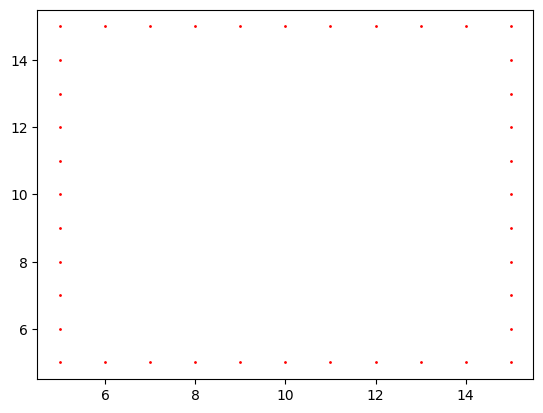

In [8]:

# Test the function
x_width = 20
y_height = 20
x1,y1,x2,y2=(5,5,15,15)

# Points inside the rectangle
target_region= np.array([[x, y] for x in range(x1+1, x2) for y in range(y1+1, y2)])

# Points outside the rectangle, bounded by max_width and max_height
source_region= np.array([[x, y] for x in range(x_width) for y in range(y_height)
                           if  (x1 <= x <= x2 and y1 <= y <= y2)])

image = np.zeros((256, 256), np.uint8) 

thickness = 1
contour = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 

# Creating rectangle
thickness = -1
target_region = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
thickness = -1
source_region =np.array(cv2.bitwise_not(target_region))

# Displaying the image  
# plt.imshow(cv2.cvtColor(contour, cv2.COLOR_BGR2RGB))

temp=np.where(np.array(np.array(contour)==255,dtype=int)==1)
contour_indices = np.array(list(zip(temp[0],temp[1])))

temp=np.where(np.array(np.array(source_region)==255,dtype=int)==1)
source_indices = np.array(list(zip(temp[0],temp[1])))

temp=np.where(np.array(np.array(target_region)==255,dtype=int)==1)
target_indices = np.array(list(zip(temp[0],temp[1])))
plt.scatter(contour_indices[:,0], contour_indices[:,1], c='r', s=1)

(3.0150757595082496,
 15.570710678118655,
 3.0150757595082496,
 15.570710678118655)

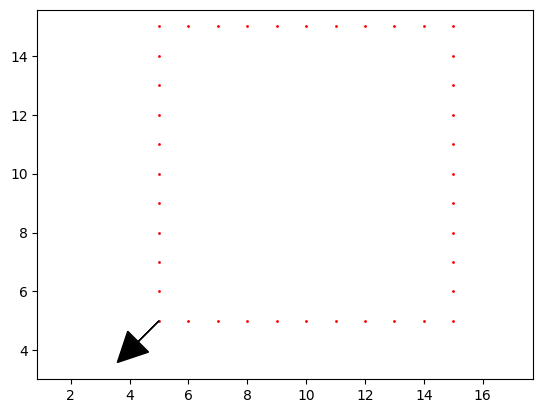

In [9]:

# Calculate the gradient in the x and y directions
grad_x = cv2.Sobel(source_region, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(source_region, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the direction of the gradient
gradient_direction = np.arctan2(grad_y, grad_x)

normal = (gradient_direction - np.pi / 2)

index=0
plt.scatter(contour_indices[:,0], contour_indices[:,1], c='r', s=1)
plt.arrow(contour_indices[index,0], contour_indices[index,1], np.cos(normal[contour_indices[index,0],contour_indices[index,1]]), -np.sin(normal[contour_indices[index,0],contour_indices[index,1]]), head_width=1, head_length=1, fc='k', ec='k')
plt.axis('equal')

1.0 	max all	 1.0
x_width 410 y_height 557


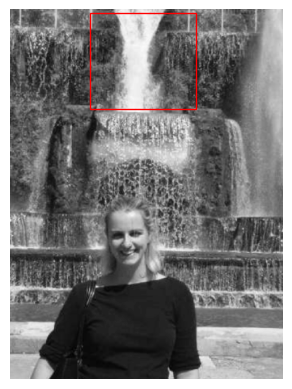

In [10]:

# Read the image
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)

# Use the isophote function
I, theta = inpaint.isophote(img, .25)


# Test the function
x_width = img.shape[1]
y_height = img.shape[0]
x1,y1,x2,y2=(120,5,280,150)
print("x_width",x_width,"y_height",y_height)


plt.imshow(img, cmap='gray')
plt.axis('off')
plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='r', facecolor='none'))
plt.show()

In [11]:

#define contour and regions
image = np.zeros((x_width, y_height), np.uint8) 
thickness = 1
contour = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
# Creating rectangle
thickness = -1
target_region = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
thickness = -1
source_region =np.array(cv2.bitwise_not(target_region))

#get x and y pixel co-ordinates
temp=np.where(np.array(np.array(contour)==255,dtype=int)==1)
contour_indices = np.array(list(zip(temp[0],temp[1])))
temp=np.where(np.array(np.array(source_region)==255,dtype=int)==1)
source_indices = np.array(list(zip(temp[0],temp[1])))
temp=np.where(np.array(np.array(target_region)==255,dtype=int)==1)
target_indices = np.array(list(zip(temp[0],temp[1])))

# Calculate the gradient in the x and y directions
grad_x = cv2.Sobel(source_region, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(source_region, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the direction of the gradient
gradient_direction = np.arctan2(grad_y, grad_x)
normal = (gradient_direction - np.pi / 2)

P=in_paint_alg(img,contour_indices,source_region,normal)



1.0 	max all	 1.0
0.9999550045926715 0.592592592592593
0.9713990064967776 0.5432098765432101
1.0 0.49382716049382713
0.9355525504363743 0.4444444444444444
0.9966245561240313 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
1.0 0.3950617283950617
0.7701078584291217 0.3950617283950617
0.6723877847348858 0.3950617283950617
0.9988856665066939 0.3950617283950617
0.7740288842194228 0.39506

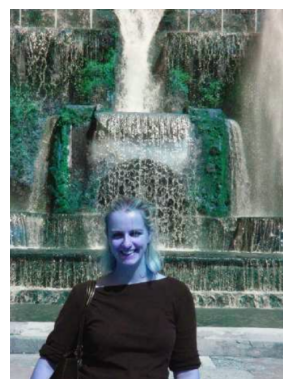

In [16]:
from skimage import io, color
img = cv2.imread('test.png',cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()
# rgb = io.imread('test.png')
# lab = color.rgb2lab(rgb)